# <font color="red">B0:Cài đặt thư viện và import </font>
- pip install pandas <br>
- pip install numpy <br>
- pip install matplotlib <br>
- pip install scikit-learn (sklearn) <br>
- pip install pickle (nếu lỗi version thì pip install pickle5) <br>
- pip install yfinance (data về chứng khoán) <br>

In [38]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# <font color="red">B1:Đọc DATA và khám phá dữ liệu ( Công ty Microsoft) </font>

In [39]:
# Ticker symbol của cổ phiếu bạn muốn dự đoán
ticker_symbol = 'MSFT'

# Lấy dữ liệu lịch sử giá cổ phiếu
stock_data = yf.download(ticker_symbol, start='2003-10-20', end='2023-10-20')


[*********************100%%**********************]  1 of 1 completed


In [40]:
stock_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-10-20,28.950001,29.370001,28.799999,29.350000,18.356850,38794500
2003-10-21,29.350000,29.430000,29.170000,29.350000,18.356850,44166800
2003-10-22,29.030001,29.209999,28.799999,28.889999,18.069149,48798500
2003-10-23,28.719999,29.080000,28.100000,28.910000,18.081654,67357900
2003-10-24,27.270000,27.400000,26.420000,26.610001,16.643122,210558300
...,...,...,...,...,...,...
2023-10-13,332.380005,333.829987,326.359985,327.730011,327.066193,21072400
2023-10-16,331.049988,336.140015,330.600006,332.640015,331.966248,22158000
2023-10-17,329.589996,333.459991,327.410004,332.059998,331.387390,18338500


In [41]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5035 entries, 2003-10-20 to 2023-10-19
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5035 non-null   float64
 1   High       5035 non-null   float64
 2   Low        5035 non-null   float64
 3   Close      5035 non-null   float64
 4   Adj Close  5035 non-null   float64
 5   Volume     5035 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 275.4 KB


In [42]:
stock_data.keys()
# Những feature của tập dữ liệu

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [43]:
stock_data.describe()
# Thống kê mô tả về tập dữ liệu

,Open,High,Low,Close,Adj Close,Volume
count,5035.000000,5035.000000,5035.000000,5035.000000,5035.000000,5.035000e+03
mean,85.317498,86.172647,84.447170,85.342371,79.210731,4.703265e+07
std,90.518917,91.473685,89.529900,90.542409,91.530043,2.884883e+07
min,15.200000,15.620000,14.870000,15.150000,11.304623,7.425600e+06
25%,27.209999,27.430000,27.010000,27.230000,19.988468,2.673180e+07
50%,35.880001,36.060001,35.490002,35.740002,29.592791,4.071710e+07
75%,107.170002,108.139999,105.785000,107.009998,101.413063,5.954170e+07
max,361.750000,366.779999,352.440002,359.489990,358.003845,5.910522e+08


# <font color="red">B2:Kiểm tra và tiền xử lý dữ liệu(nếu có) </font>

In [44]:
stock_data.shape
# kích thước dữ liệu

(5035, 6)

In [45]:
stock_data.dtypes
#Kiểu dữ liệu của từng feature

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [46]:
stock_data.isnull().sum()
#check missing value

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### <font color = 'yellow' >Ta thấy tập dữ liệu này khá là sạch<font>

### Vẽ biểu đồ phân tích

1: Biểu đồ cột

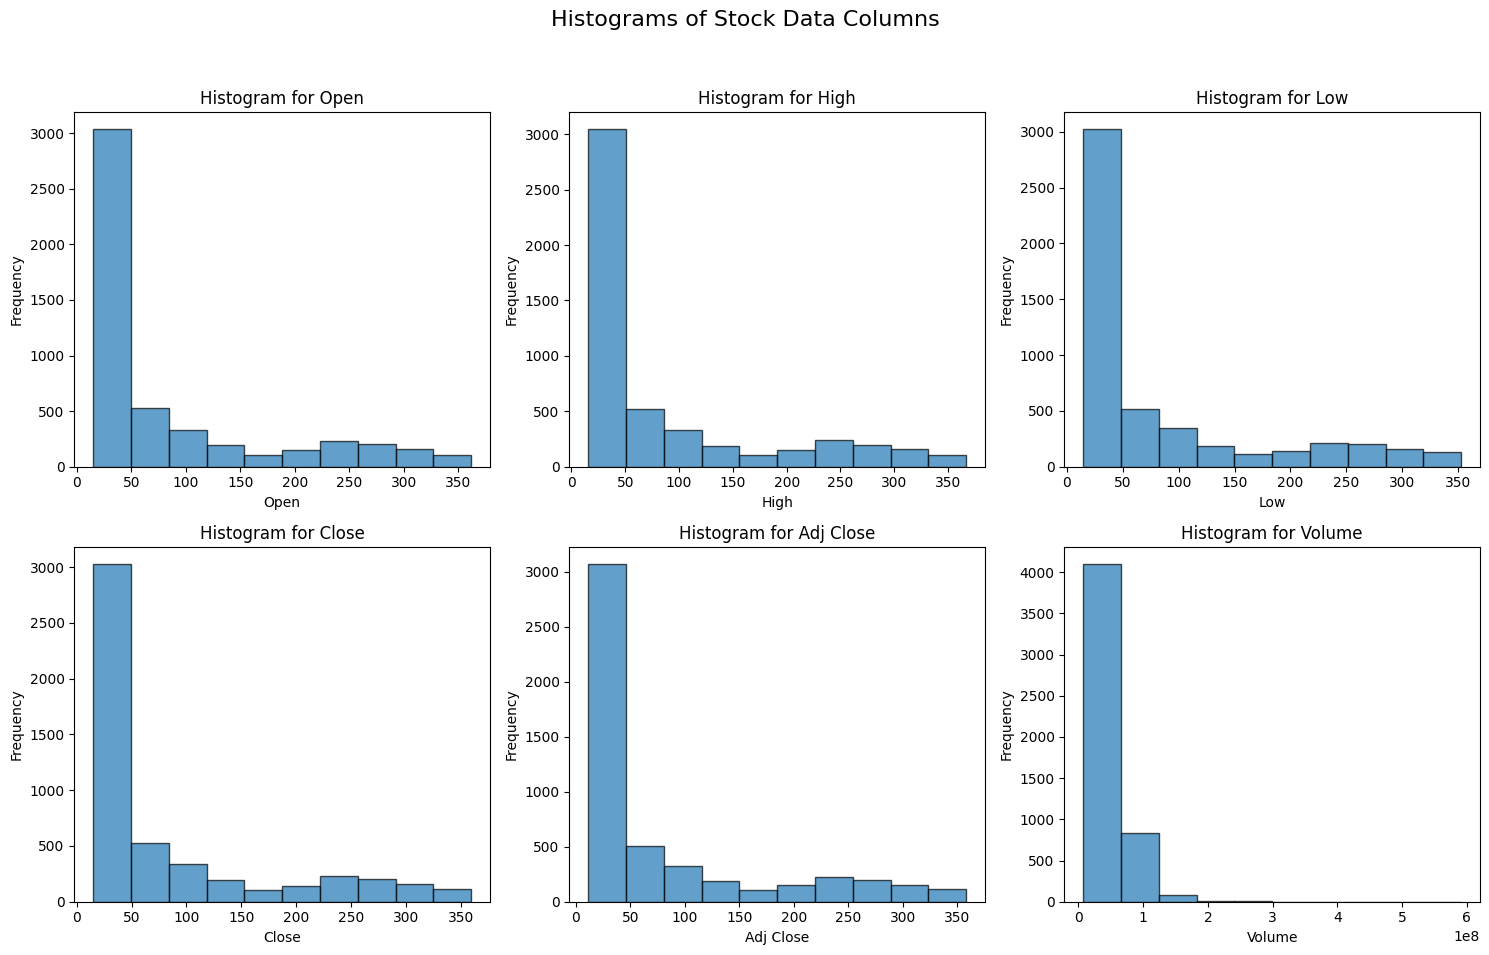

In [47]:
import matplotlib.pyplot as plt
import pandas as pd

# Giả sử stock_data là DataFrame của bạn
# Đảm bảo bạn đã import thư viện pandas và đã có dữ liệu

# Tạo subplot
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
fig.suptitle('Histograms of Stock Data Columns', fontsize=16)

# Duyệt qua từng cột và vẽ biểu đồ histogram
for i, column in enumerate(stock_data.columns):
    row, col = divmod(i, 3)
    axs[row, col].hist(stock_data[column], bins=10, edgecolor='k', alpha=0.7)
    axs[row, col].set_title(f'Histogram for {column}')
    axs[row, col].set_xlabel(column)
    axs[row, col].set_ylabel('Frequency')

# Tự điều chỉnh khoảng cách giữa các subplot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Hiển thị biểu đồ
plt.show()


Biểu đồ hộp

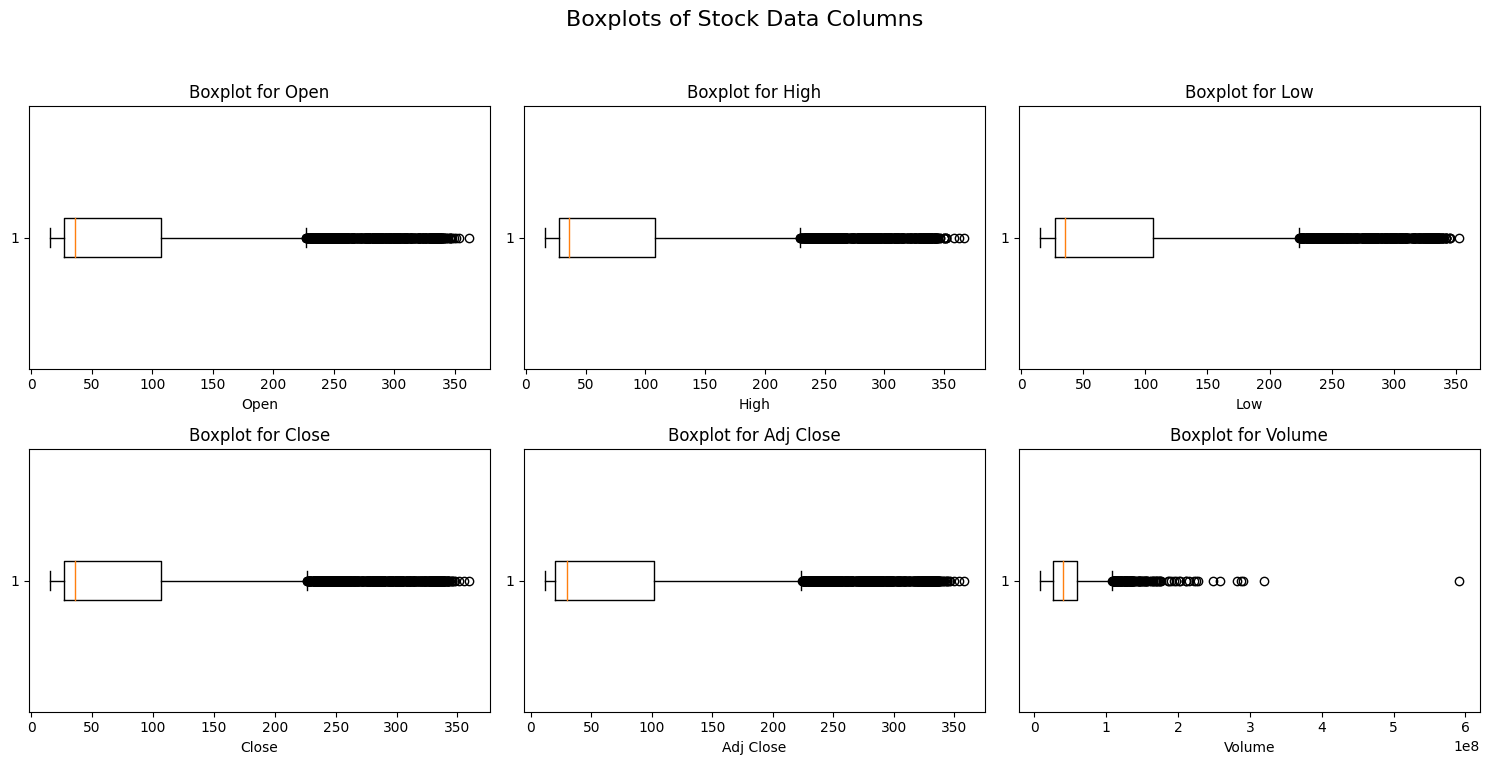

In [48]:
import matplotlib.pyplot as plt
import pandas as pd

# Giả sử stock_data là DataFrame của bạn
# Đảm bảo bạn đã import thư viện pandas và đã có dữ liệu

# Tạo subplot
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
fig.suptitle('Boxplots of Stock Data Columns', fontsize=16)

# Duyệt qua từng cột và vẽ biểu đồ boxplot
for i, column in enumerate(stock_data.columns):
    row, col = divmod(i, 3)
    axs[row, col].boxplot(stock_data[column], vert=False)
    axs[row, col].set_title(f'Boxplot for {column}')
    axs[row, col].set_xlabel(column)

# Tự điều chỉnh khoảng cách giữa các subplot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Hiển thị biểu đồ
plt.show()


Biểu đồ heatmap

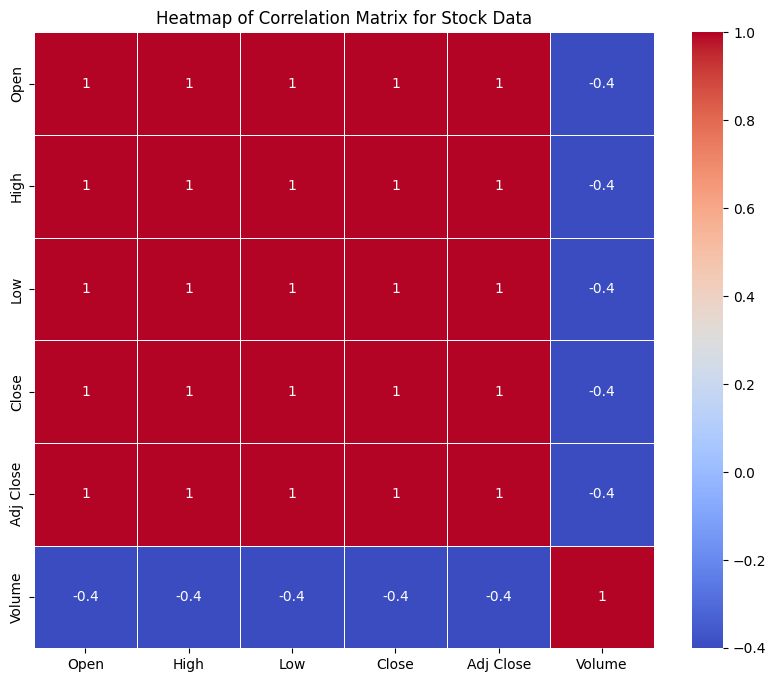

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Giả sử stock_data là DataFrame của bạn
# Đảm bảo bạn đã import thư viện pandas và seaborn và đã có dữ liệu

# Tạo heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(stock_data.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of Correlation Matrix for Stock Data')
plt.show()


Biểu đồ scatter thể hiện sự tuyến tính giữa từng cột với cột adj close

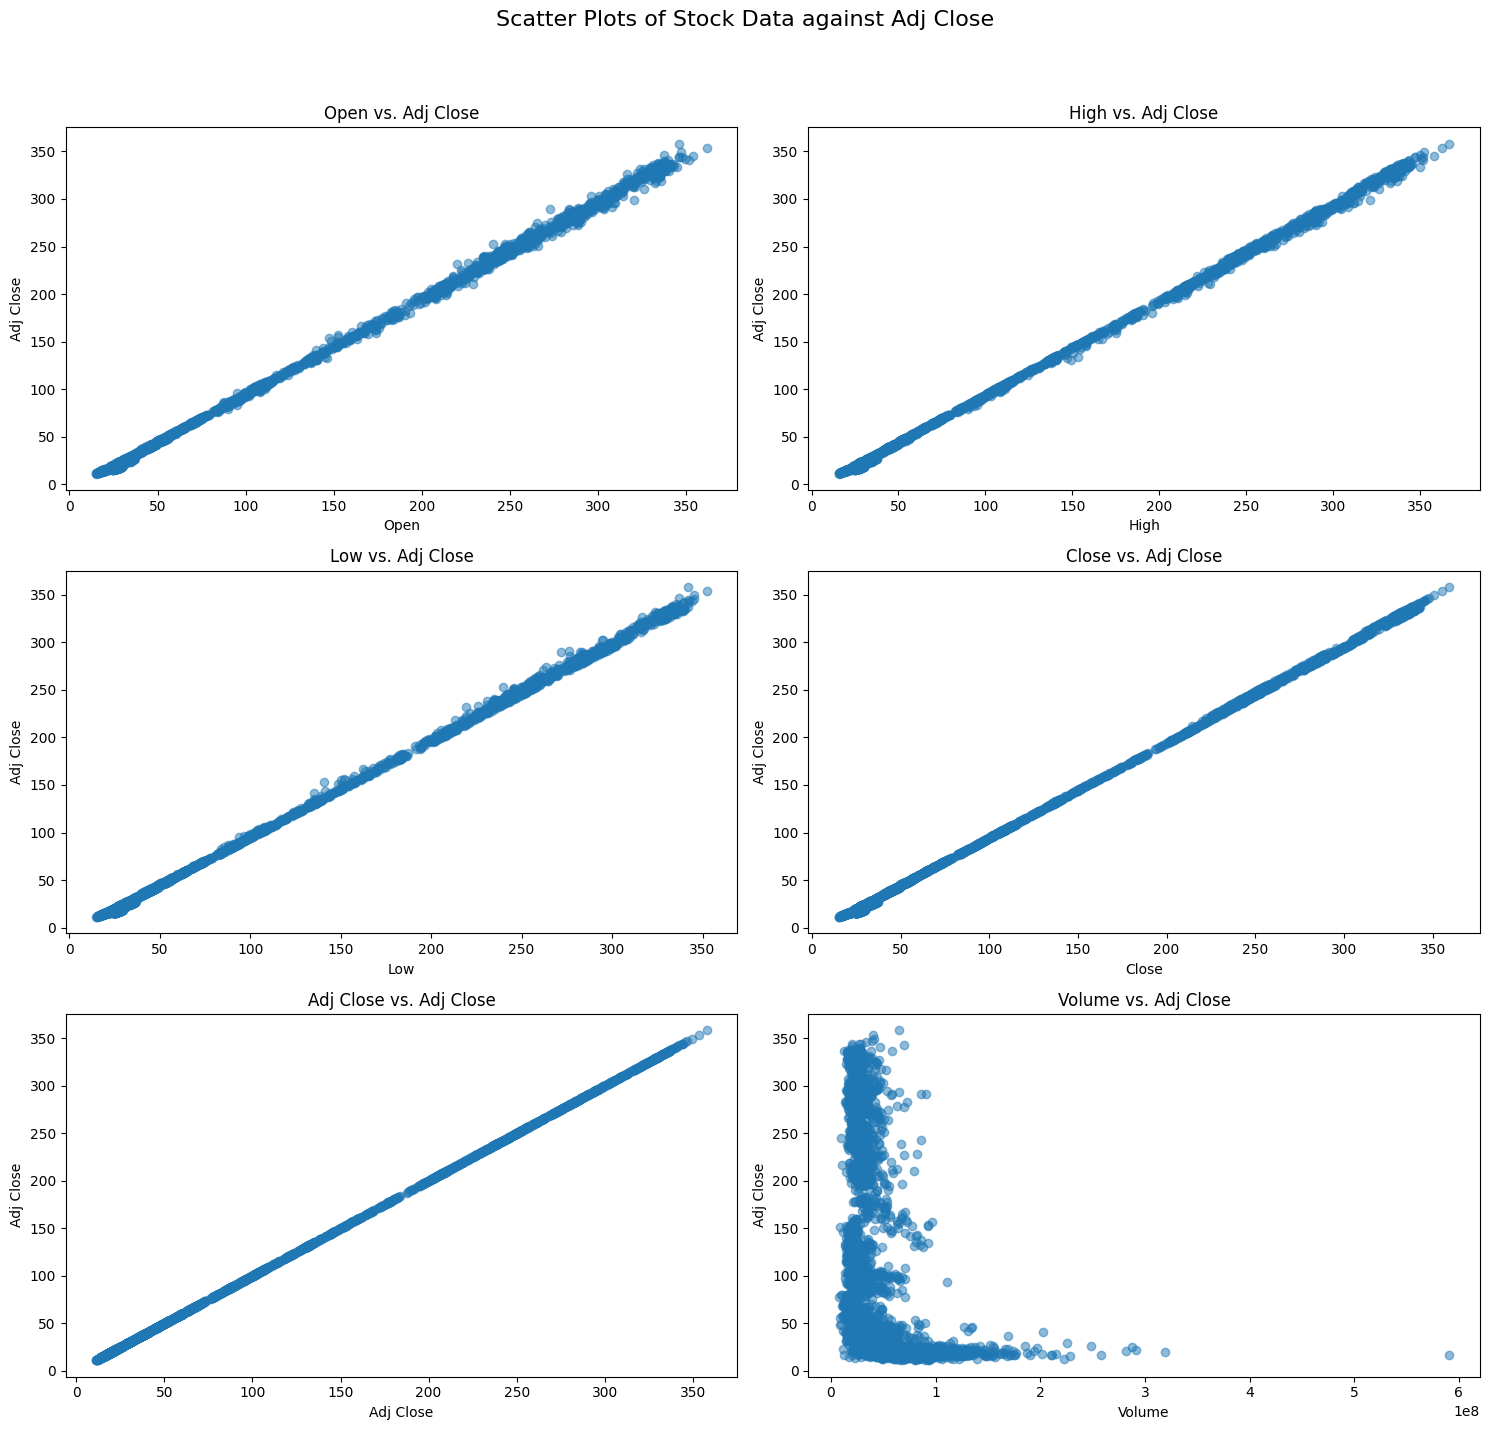

In [50]:

# Tính toán số lượng cột và số lượng hàng dựa vào số cột trong DataFrame
num_cols = len(stock_data.columns)
num_rows = (num_cols + 1) // 2  # Số hàng làm tròn lên nếu có số lẻ cột

# Tạo subplot
fig, axs = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, 5 * num_rows))
fig.suptitle('Scatter Plots of Stock Data against Adj Close', fontsize=16)

# Duyệt qua từng cột và vẽ biểu đồ scatter
for i, column in enumerate(stock_data.columns):
    row, col = divmod(i, 2)
    axs[row, col].scatter(stock_data[column], stock_data['Adj Close'], alpha=0.5)
    axs[row, col].set_title(f'{column} vs. Adj Close')
    axs[row, col].set_xlabel(column)
    axs[row, col].set_ylabel('Adj Close')

# Hiển thị biểu đồ
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### <font color = 'yellow' >Thông qua biểu đồ heatmap và biểu đồ scatter, ta thấy sự phụ thuộc tuyến tính giữa cột Adj close với các cột Open, hight, low, close. <br>Vì thế nên ta sẽ chia tập X, y như sau <font>

In [51]:
# Chọn cột 'Adj Close' (giá đóng cửa đã điều chỉnh) làm biến phụ thuộc (y)
y = stock_data['Adj Close']
y

Date
2003-10-20     18.356850
2003-10-21     18.356850
2003-10-22     18.069149
2003-10-23     18.081654
2003-10-24     16.643122
                 ...    
2023-10-13    327.066193
2023-10-16    331.966248
2023-10-17    331.387390
2023-10-18    329.441345
2023-10-19    330.648895
Name: Adj Close, Length: 5035, dtype: float64

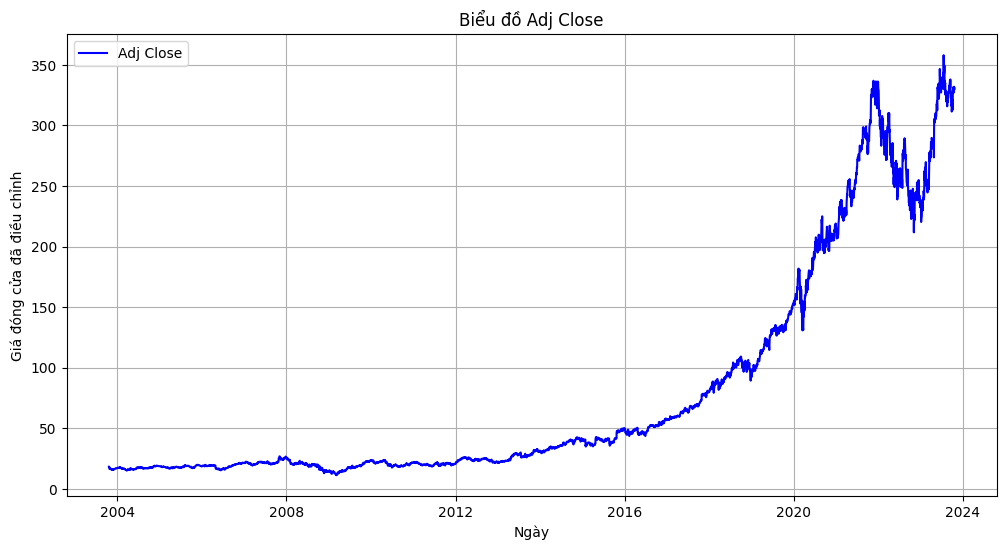

In [52]:
# Vẽ biểu đồ đường cho cột 'Adj Close'
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, y, label='Adj Close', color='blue')
plt.title('Biểu đồ Adj Close')
plt.xlabel('Ngày')
plt.ylabel('Giá đóng cửa đã điều chỉnh')
plt.legend()
plt.grid(True)
plt.show()

In [53]:
# Chọn các cột trừ cột 'Adj Close' và 'Volume làm biến độc lập (x)
X = stock_data.drop(columns=['Adj Close','Volume'])
X

,Open,High,Low,Close
Date,,,,
2003-10-20,28.950001,29.370001,28.799999,29.350000
2003-10-21,29.350000,29.430000,29.170000,29.350000
2003-10-22,29.030001,29.209999,28.799999,28.889999
2003-10-23,28.719999,29.080000,28.100000,28.910000
2003-10-24,27.270000,27.400000,26.420000,26.610001
...,...,...,...,...
2023-10-13,332.380005,333.829987,326.359985,327.730011
2023-10-16,331.049988,336.140015,330.600006,332.640015
2023-10-17,329.589996,333.459991,327.410004,332.059998


### <font color = 'yellow' >Thay vì sử dụng chỉ số( index) là số thứ tự thì ta sẽ dùng ngày tháng. Do ko ảnh hưởng đến việc huấn luyện nên ta không cần chuyển về dạng số thứ tự<font>

In [54]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
#kiểm tra độ lớn của dữ liệu sau khi chia

(4028, 4)
(1007, 4)
(4028,)
(1007,)


In [56]:
X_train

,Open,High,Low,Close
Date,,,,
2016-05-09,50.490002,50.590000,50.000000,50.070000
2006-03-01,26.980000,27.200001,26.950001,27.139999
2016-01-06,54.320000,54.400002,53.639999,54.049999
2006-04-13,27.080000,27.200001,27.000000,27.070000
2005-08-03,26.760000,27.430000,26.730000,27.250000
...,...,...,...,...
2021-05-20,243.960007,247.949997,243.860001,246.479996
2005-08-25,26.900000,27.090000,26.850000,27.030001
2016-02-02,54.169998,54.259998,52.650002,53.000000


In [57]:
X_test

,Open,High,Low,Close
Date,,,,
2018-04-09,91.040001,93.169998,90.620003,90.769997
2022-06-09,267.779999,272.709991,264.630005,264.790009
2012-12-12,27.530001,27.620001,27.080000,27.240000
2020-08-31,227.000000,228.699997,224.309998,225.529999
2008-11-04,23.129999,23.660000,22.870001,23.530001
...,...,...,...,...
2013-10-22,35.020000,35.099998,34.520000,34.580002
2018-03-14,95.120003,95.410004,93.500000,93.849998
2005-08-22,26.790001,27.170000,26.770000,26.910000


In [58]:
y_train

Date
2016-05-09     44.814968
2006-03-01     19.271481
2016-01-06     48.032387
2006-04-13     19.221781
2005-08-03     19.171017
                 ...    
2021-05-20    241.142029
2005-08-25     19.072643
2016-02-02     47.099285
2018-10-12    103.599815
2007-03-22     20.365877
Name: Adj Close, Length: 4028, dtype: float64

In [59]:
y_test

Date
2018-04-09     85.126198
2022-06-09    261.170837
2012-12-12     22.263933
2020-08-31    219.058075
2008-11-04     17.320711
                 ...    
2013-10-22     28.899145
2018-03-14     88.014687
2005-08-22     18.987965
2023-05-08    306.703552
2008-10-31     16.437374
Name: Adj Close, Length: 1007, dtype: float64

### <font color = 'yellow' >Ta hãy lưu mô hình chuẩn hóa sau vào 1 file, để sau này chúng ta sẽ chuẩn hóa dữ liệu nhập vào theo file này( lưu chuẩn hóa của X vì dữ liệu chúng ta nhập vào là tập dữ liệu X, tức đầu vào)<font>

In [60]:
from sklearn.preprocessing import MinMaxScaler
minmax_scale = MinMaxScaler()
X_train = minmax_scale.fit_transform(X_train)
import pickle
with open("../Scaler_data/Scaler_Microsoft.pkl", "wb") as file:
    pickle.dump(minmax_scale, file)
X_test = minmax_scale.transform(X_test)

In [61]:
X_train, X_train.shape

(array([[0.10183235, 0.09958424, 0.1040673 , 0.1014114 ],
        [0.03399221, 0.03297642, 0.03578517, 0.03482024],
        [0.11288414, 0.110434  , 0.11485025, 0.11296974],
        ...,
        [0.1124513 , 0.11003531, 0.11191753, 0.10992043],
        [0.27069688, 0.27229752, 0.27327666, 0.27420573],
        [0.03843601, 0.03682082, 0.03892526, 0.03810188]]),
 (4028, 4))

In [62]:
X_test,X_test.shape

(array([[0.21884288, 0.2208395 , 0.22439791, 0.21960852],
        [0.72884143, 0.73211639, 0.73987618, 0.72498117],
        [0.03557928, 0.03417246, 0.03617028, 0.03511065],
        ...,
        [0.03344395, 0.03289099, 0.03525195, 0.03415229],
        [0.85104604, 0.8388769 , 0.86269513, 0.85235524],
        [0.02115135, 0.02075977, 0.02147703, 0.02085149]]),
 (1007, 4))

# <font color = 'red'>3:Huấn luyện mô hình<font>

In [63]:
# Mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X_train, y_train) # fit chính là hàm đào tạo

LinearRegression()

# <font color="red">4:Đánh giá mô hình</font>

In [64]:
from sklearn.metrics import mean_squared_error, r2_score
#mean_squared_error càng thấp(về 0) càng tốt
#r2_score càng cao càng tốt

In [65]:
y_pred = model.predict(X_test) #dự báo y_pred dựa trên tập x_test
y_pred_train = model.predict(X_train)
# Đánh giá mô hình bằng một số các metric, gói gọn vào 1 hàm để sử dụng ở phần sau
def rate(y_test, y_pred,y_train,y_pred_train):
    print('--------Kết quả trên dữ liệu huấn luyện-------')
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)

    print("Mean Squared Error (MSE):", mse_train)
    print("R-squared (R2) Score:", r2_train)

    print('--------Kết quả thẩm định-------')
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("Mean Squared Error (MSE):", mse)
    print("R-squared (R2) Score:", r2)

In [66]:
y_pred.shape

(1007,)

In [67]:
y_test.shape

(1007,)

In [68]:
rate(y_test, y_pred,y_train,y_pred_train)

--------Kết quả trên dữ liệu huấn luyện-------
Mean Squared Error (MSE): 2.0141425869809484
R-squared (R2) Score: 0.9997578602647381
--------Kết quả thẩm định-------
Mean Squared Error (MSE): 2.1567591746513752
R-squared (R2) Score: 0.9997494474478666


In [69]:
print(y_test)

Date
2018-04-09     85.126198
2022-06-09    261.170837
2012-12-12     22.263933
2020-08-31    219.058075
2008-11-04     17.320711
                 ...    
2013-10-22     28.899145
2018-03-14     88.014687
2005-08-22     18.987965
2023-05-08    306.703552
2008-10-31     16.437374
Name: Adj Close, Length: 1007, dtype: float64


In [70]:
print(y_pred)

[ 84.8650274  261.00290427  20.51731152 ...  20.18687237 304.57382826
  15.59362199]


In [71]:
df_result = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred})
df_compare = df_result.head(10)
df_compare
#so sánh dữ liệu thực tế với dự đoán

,Actual,Predicted
Date,,
2018-04-09,85.126198,84.865027
2022-06-09,261.170837,261.002904
2012-12-12,22.263933,20.517312
2020-08-31,219.058075,220.889384
2008-11-04,17.320711,16.783779
2013-04-17,23.758575,22.113482
2004-10-04,17.639435,21.396511
2020-09-14,199.515472,200.786596
2020-04-17,172.575806,173.377856


<AxesSubplot:xlabel='Date'>

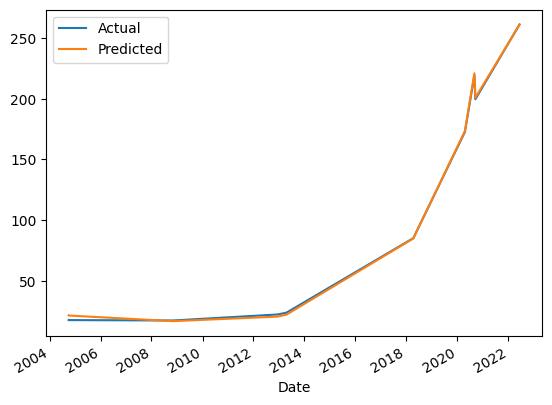

In [72]:
df_compare.plot(kind='line')
# lập biểu đồ độ để dễ đánh giá

### <font color = "green"> Ta thấy mô hình quá tốt<font>

# <font color="red">5:Lưu mô hình</font>

Ta đang triển khai mô hình trong biến model

In [73]:
import pickle
# Tải mô hình từ file
with open('../Model_data/Microsoft.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)